In [2]:
# Import the neccessary library/modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
from statsmodels.stats.proportion import proportions_ztest
from scipy.special import expit, logit
from sklearn.preprocessing import LabelEncoder

# Read the dataset csv file and store it into a dataframe called "df"
df = pd.read_csv(r'F:\Data Indra\Project\project stat busi\employee productivity\dataset productivity\train_dataset.csv')
# use function head() to display first five rows dataset
df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003


In [3]:
df.shape

(1017, 26)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [4]:
df.isnull().any()

team                     False
targeted_productivity    False
smv                      False
wip                       True
over_time                False
incentive                False
idle_time                False
idle_men                 False
no_of_style_change       False
no_of_workers            False
month                    False
quarter_Quarter1         False
quarter_Quarter2         False
quarter_Quarter3         False
quarter_Quarter4         False
quarter_Quarter5         False
department_finishing     False
department_finishing     False
department_sweing        False
day_Monday               False
day_Saturday             False
day_Sunday               False
day_Thursday             False
day_Tuesday              False
day_Wednesday            False
actual_productivity      False
dtype: bool

In [4]:
# Checking data 'wip' compare with data 'departmnet_sweing'
df_WipSew = df[["wip","department_sweing"]]
df_WipSew.head(10)

,wip,department_sweing
0,NaN,0
1,909.0,1
2,NaN,0
3,762.0,1
4,767.0,1
5,NaN,0
6,924.0,1
7,NaN,0
8,1086.0,1
9,900.0,1


In [5]:
# Counting NaN values in the 'wip' column
wip_nan_count = df['wip'].isna().sum()
print(f'the total NaN value in the wip column is : {wip_nan_count}')

# Counting zero values in the 'department_sweing' column
count_zero = df_WipSew['department_sweing'].value_counts()[0]
print(f'the total zero value in the department_sweing column is : {count_zero}')

the total NaN value in the wip column is : 423
the total zero value in the department_sweing column is : 423


In [6]:
#Replace NaN Values with Zeros in 'wip' columns
#make a copy df to protect the original dataset than replace the null
df1 = df.copy()
df1['wip'] = df1['wip'].fillna(0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    1017 non-null   float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

In [7]:
#identify duplicate rows
duplicateRows = df1[df1.duplicated()]

#view duplicate rows
duplicateRows

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity


In [8]:
# display the columns list
df.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'actual_productivity'],
      dtype='object')

In [9]:
#compare the value column 'department_finising' and 'department_finising '
df_finish = df[['department_finishing', 'department_finishing ']]
df_finish.head(10)

,department_finishing,department_finishing
0,1,0
1,0,0
2,0,1
3,0,0
4,0,0
5,0,1
6,0,0
7,1,0
8,0,0
9,0,0


In [10]:
# Renaming certain columns for better readability
df1 = df1.rename(columns={'no_of_style_change': 'style_change',
                        'no_of_workers': 'no_workers',
                        'quarter_Quarter1': 'quarter1',
                        'quarter_Quarter2': 'quarter2',
                        'quarter_Quarter3': 'quarter3',
                        'quarter_Quarter4': 'quarter4',
                        'quarter_Quarter5': 'quarter5',
                        'department_finishing': 'finishing1',
                        'department_finishing ': 'finishing2',
                        'department_sweing': 'sewing',
                        'day_Monday': 'monday',
                        'day_Saturday': 'saturday',
                        'day_Sunday': 'sunday',
                        'day_Thursday': 'thursday',
                        'day_Tuesday': 'tuesday',
                        'day_Wednesday': 'wednesday'
                        })
df1.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'style_change', 'no_workers', 'month',
       'quarter1', 'quarter2', 'quarter3', 'quarter4', 'quarter5',
       'finishing1', 'finishing2', 'sewing', 'monday', 'saturday', 'sunday',
       'thursday', 'tuesday', 'wednesday', 'actual_productivity'],
      dtype='object')

In [11]:
# adding new column 'failure' contain data productivity achievement 
# first, make a new dataframe (df_failure) as a copy of df1 (for back up)
df_failure = df1.copy()

# create function get_fail(productivity)
# derived from actual vs target productivity difference
# function condition: if difference < 0 return 1 else 0 (Null)
def get_fail(productivity):
  diff = productivity['actual_productivity'] - productivity['targeted_productivity']

  if (diff < 0):
      return 1
  else:
      return 0

#apply get_fail() function to dataframe
df_failure['failure'] = df_failure.apply(get_fail, axis=1)
df_failure.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,style_change,no_workers,...,finishing2,sewing,monday,saturday,sunday,thursday,tuesday,wednesday,actual_productivity,failure
0,9,0.75,3.94,0.0,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,0,1,0.755167,0
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,1,0,0,0,1,0,0,0.535678,1
2,3,0.80,4.15,0.0,1440,0,0.0,0,0,7.0,...,1,0,0,0,0,0,0,1,0.820833,0
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,1,0,0,0,0,0,1,0.581131,1
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,1,1,0,0,0,0,0,0.790003,0


In [12]:
# Move the predict variable "failure" to the front of the table
front = df_failure['failure']
df_failure.drop(labels=['failure'], axis=1,inplace = True)
df_failure.insert(0, 'failure', front)
df_failure.head()


,failure,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,style_change,...,finishing1,finishing2,sewing,monday,saturday,sunday,thursday,tuesday,wednesday,actual_productivity
0,0,9,0.75,3.94,0.0,960,0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0.755167
1,1,7,0.65,30.10,909.0,7080,0,0.0,0,1,...,0,0,1,0,0,0,1,0,0,0.535678
2,0,3,0.80,4.15,0.0,1440,0,0.0,0,0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,1,0.65,22.53,762.0,5040,0,0.0,0,1,...,0,0,1,0,0,0,0,0,1,0.581131
4,0,4,0.70,30.10,767.0,3300,50,0.0,0,1,...,0,0,1,1,0,0,0,0,0,0.790003


In [13]:
# create dataframe of numerical data
df_failure_num = df_failure[['failure','targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'style_change', 'no_workers','actual_productivity']]
df_failure_num.head()

,failure,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,style_change,no_workers,actual_productivity
0,0,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167
1,1,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,0.535678
2,0,0.80,4.15,0.0,1440,0,0.0,0,0,7.0,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,0.581131
4,0,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,0.790003


In [14]:
# display descriptive statistical analysis from numerical data
df_failure_num.describe()

,failure,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,style_change,no_workers,actual_productivity
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,0.263520,0.730747,15.150492,691.062930,4532.940020,40.689282,0.564405,0.398230,0.160275,34.846116,0.736509
std,0.440759,0.097384,10.946096,1489.481792,3275.997333,173.240655,10.093731,3.351712,0.440199,22.185292,0.174304
min,0.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.651515
50%,0.000000,0.750000,15.260000,601.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,1.000000,0.800000,24.260000,1083.000000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850170
max,1.000000,0.800000,54.560000,23122.000000,15120.000000,3600.000000,270.000000,45.000000,2.000000,89.000000,1.108125


In [15]:
failure_rate = df_failure.failure.value_counts() / 1017
failure_rate


0    0.73648
1    0.26352
Name: failure, dtype: float64

In [16]:
df_failure_num.groupby('failure').mean()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,style_change,no_workers,actual_productivity
failure,,,,,,,,,,
0,0.730267,16.055928,825.104139,4953.070761,47.010681,0.329773,0.086782,0.161549,38.022697,0.805306
1,0.732090,12.620000,316.447761,3358.768657,23.022388,1.220149,1.268657,0.156716,25.968284,0.544235


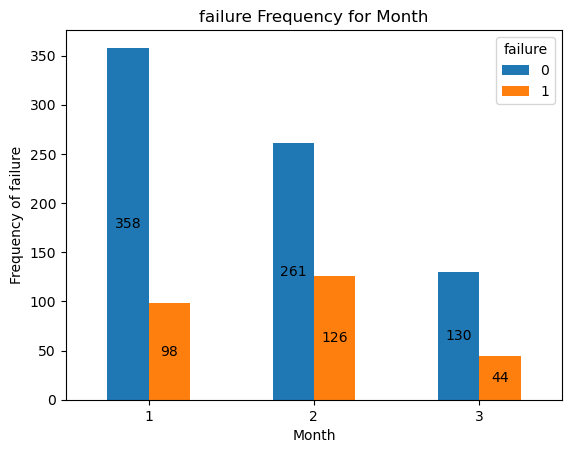

In [17]:
# frequency distribution analysis of categorical data
# visualize the frequency distribution of month vs failure
ct_month = pd.crosstab(df_failure.month,df_failure.failure)
    
ax_month = ct_month.plot(kind='bar', stacked=False, rot=0)
plt.title('failure Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of failure')
plt.savefig('failure_freq_month')
ax_month.legend(title='failure')

# add annotations if desired
for c in ax_month.containers:
    
    # set the bar label
    ax_month.bar_label(c, label_type='center')


In [18]:
df_failure.groupby(['failure','month'])['failure'].count()

failure  month
0        1        358
         2        261
         3        130
1        1         98
         2        126
         3         44
Name: failure, dtype: int64

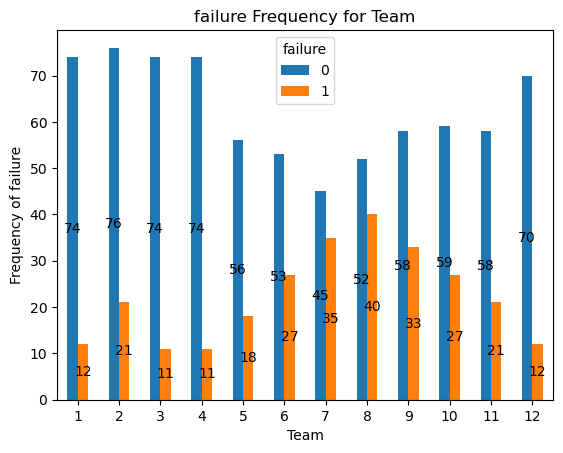

In [19]:
# visualize the frequency distribution of team vs failure
ct = pd.crosstab(df_failure.team,df_failure.failure)
    
ax = ct.plot(kind='bar', stacked=False, rot=0)
plt.title('failure Frequency for Team')
plt.xlabel('Team')
plt.ylabel('Frequency of failure')
plt.savefig('failure_freq_team')
ax.legend(title='failure')

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

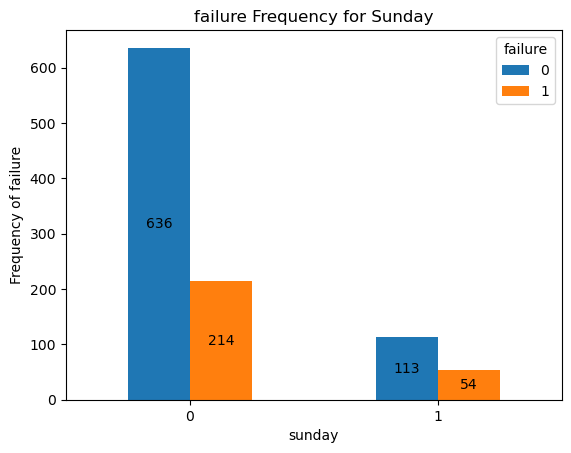

In [22]:
# create plot crosstab day of the week vs failure 
# sunday vs failure 
ct1 = pd.crosstab(df_failure.sunday,df_failure.failure)
ax1 = ct1.plot(kind='bar', stacked=False, rot=0)
plt.title('failure Frequency for Sunday')
plt.xlabel('sunday')
plt.ylabel('Frequency of failure')
#plt.savefig('failure_fre_sunday')
ax.legend(title='failure')
for c in ax1.containers:
    
    # set the bar label
    ax1.bar_label(c, label_type='center')

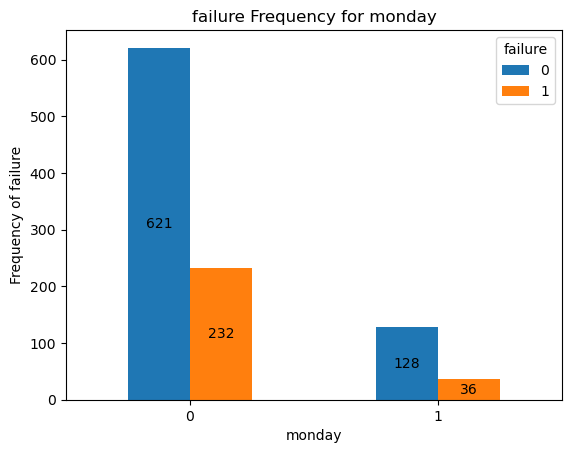

In [23]:
# create plot crosstab day of the week vs failure 
# monday vs failure 
ct2= pd.crosstab(df_failure.monday,df_failure.failure)
ax2 = ct2.plot(kind='bar', stacked=False, rot=0)
plt.title('failure Frequency for monday')
plt.xlabel('monday')
plt.ylabel('Frequency of failure')
#plt.savefig('failure_fre_monday')
ax.legend(title='failure')
for c in ax2.containers:
    
    # set the bar label
    ax2.bar_label(c, label_type='center')

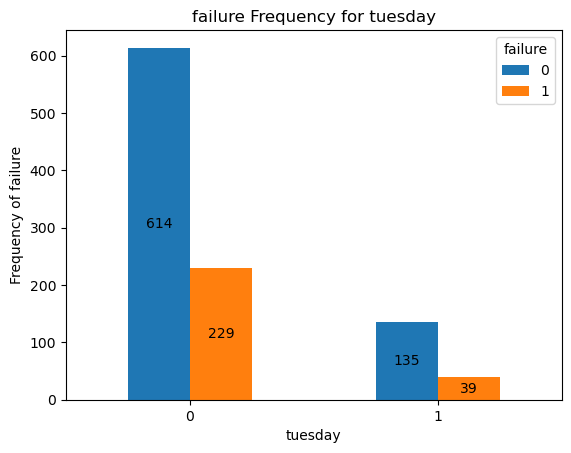

In [24]:
# create plot crosstab day of the week vs failure 
# tuesday vs failure 
ct3= pd.crosstab(df_failure.tuesday,df_failure.failure)
ax3 = ct3.plot(kind='bar', stacked=False, rot=0)
plt.title('failure Frequency for tuesday')
plt.xlabel('tuesday')
plt.ylabel('Frequency of failure')
#plt.savefig('failure_fre_tuesday')
ax.legend(title='failure')
for c in ax3.containers:
    
    # set the bar label
    ax3.bar_label(c, label_type='center')

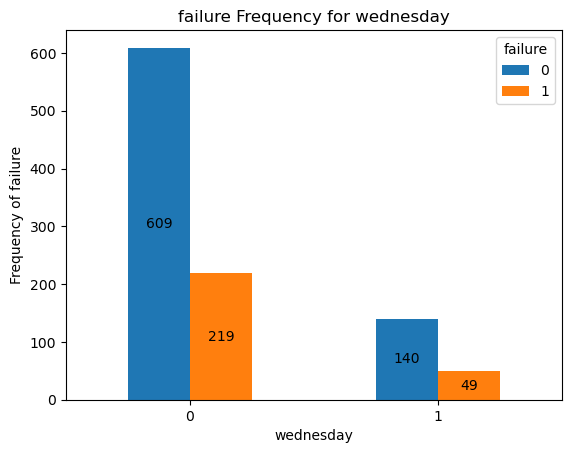

In [25]:
# create plot crosstab day of the week vs failure 
# wednesday vs failure 
ct4= pd.crosstab(df_failure.wednesday,df_failure.failure)
ax4 = ct4.plot(kind='bar', stacked=False, rot=0)
plt.title('failure Frequency for wednesday')
plt.xlabel('wednesday')
plt.ylabel('Frequency of failure')
#plt.savefig('failure_fre_wednesday')
ax.legend(title='failure')
for c in ax4.containers:
    
    # set the bar label
    ax4.bar_label(c, label_type='center')

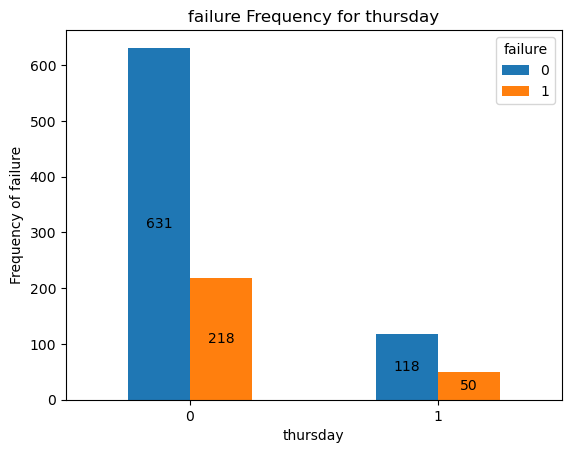

In [26]:
# create plot crosstab day of the week vs failure 
# thursday vs failure 
ct5= pd.crosstab(df_failure.thursday,df_failure.failure)
ax5 = ct5.plot(kind='bar', stacked=False, rot=0)
plt.title('failure Frequency for thursday')
plt.xlabel('thursday')
plt.ylabel('Frequency of failure')
#plt.savefig('failure_fre_thursday')
ax.legend(title='failure')
for c in ax5.containers:
    
    # set the bar label
    ax5.bar_label(c, label_type='center')

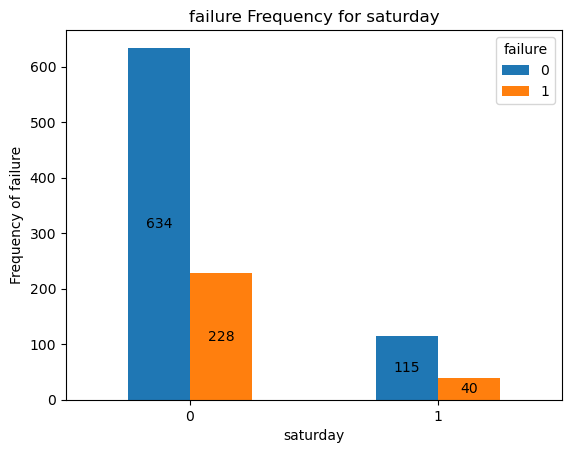

In [27]:
# create plot crosstab day of the week vs failure 
# saturday vs failure 
ct6= pd.crosstab(df_failure.saturday,df_failure.failure)
ax6 = ct6.plot(kind='bar', stacked=False, rot=0)
plt.title('failure Frequency for saturday')
plt.xlabel('saturday')
plt.ylabel('Frequency of failure')
#plt.savefig('failure_fre_saturday')
ax.legend(title='failure')
for c in ax6.containers:
    
    # set the bar label
    ax6.bar_label(c, label_type='center')

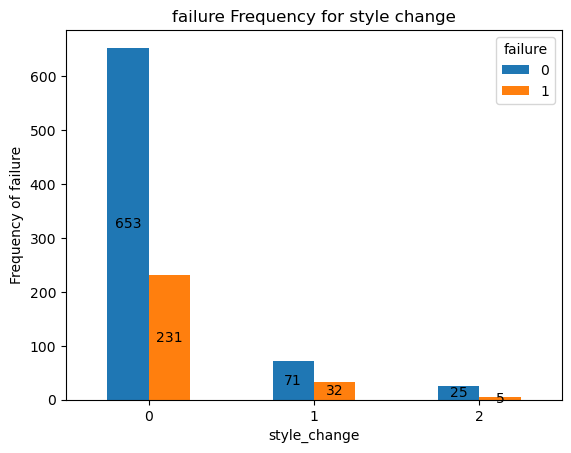

In [28]:
# create plot crosstab style_change vs failure 
# style_change vs failure 
ct_style= pd.crosstab(df_failure.style_change,df_failure.failure)
ax_style = ct_style.plot(kind='bar', stacked=False, rot=0)
plt.title('failure Frequency for style change')
plt.xlabel('style_change')
plt.ylabel('Frequency of failure')
#plt.savefig('failure_fre_style_change')
ax.legend(title='failure')
for c in ax_style.containers:
    
    # set the bar label
   ax_style.bar_label(c, label_type='center')

<Axes: >

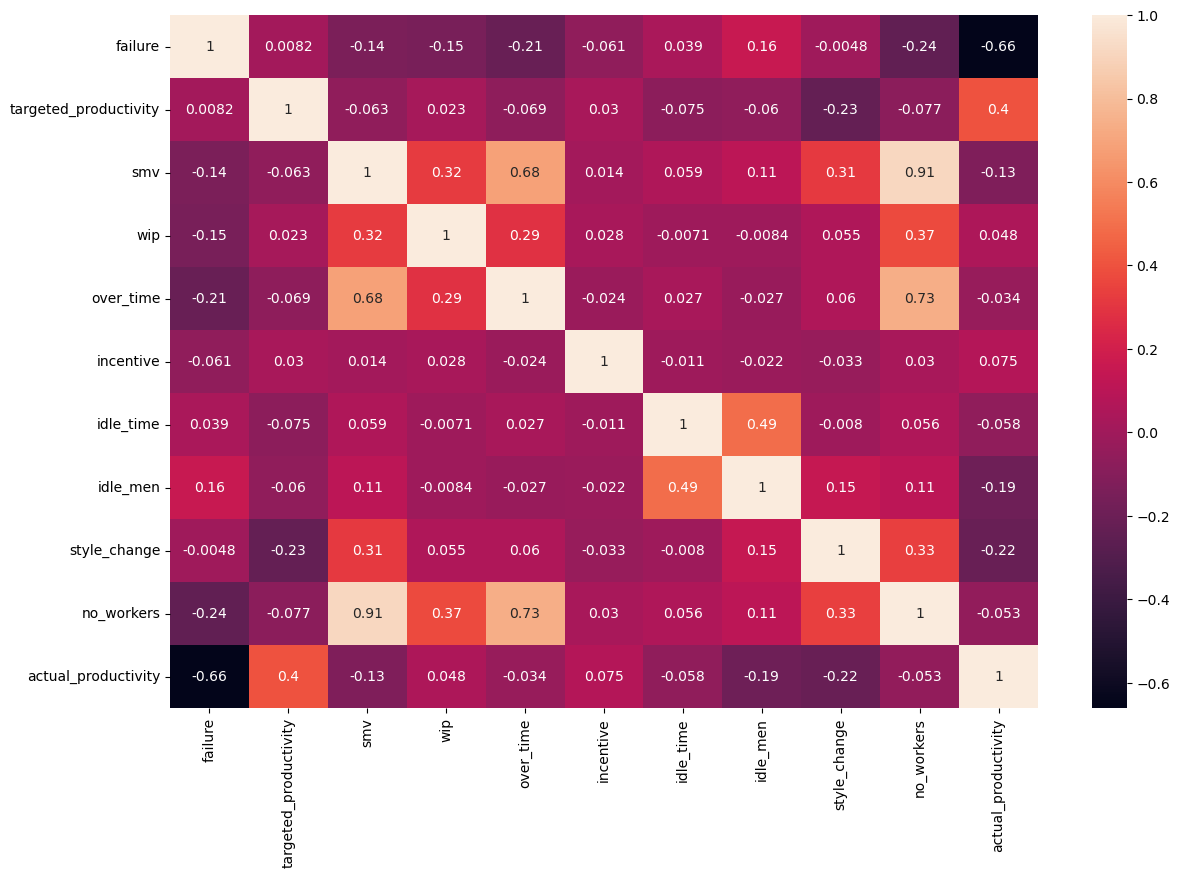

In [29]:
# create plot of the correlation numerical variables in heatmap
plt.figure(figsize=(14,9))
sns.heatmap(df_failure_num.corr(), annot=True)

In [20]:
# determine pearson correlation coefficient using corr() function
corr_failure_num= df_failure_num.corr()['failure']
print(corr_failure_num)

failure                  1.000000
targeted_productivity    0.008249
smv                     -0.138352
wip                     -0.150519
over_time               -0.214500
incentive               -0.061031
idle_time                0.038880
idle_men                 0.155420
style_change            -0.004838
no_workers              -0.239487
actual_productivity     -0.660167
Name: failure, dtype: float64


In [32]:
df_failure_num.head()

,failure,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,style_change,no_workers,actual_productivity
0,0,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.755167
1,1,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,0.535678
2,0,0.80,4.15,0.0,1440,0,0.0,0,0,7.0,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,0.581131
4,0,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,0.790003


In [21]:
#Hipotesis Testing of variable correlation
# Create function to calculate correlation coeff. Pearson & p-valu

def calculate_corr_pvalue(data, column1, column2, alpha=0.05):
    """
    function to calculate correlation coeff. Pearson & p-value.
    Parameters:
    - data: DataFrame, dataset
    - column1: str, column1 name (independent var.)
    - column2: str, column2 name (independent var.)
    - alpha: float, alpha value (default=0.05)
    """
    # get data needed
    var1 = df_failure_num[column1]
    var2 = df_failure_num[column2]
    # calculate correlation coeff. Pearson & p-value
    correlation, p_value = scipy.stats.pearsonr(var1, var2)
    # display the result
    print(f"coefficient correlation between {column1} and {column2}: {correlation}")
    print(f"P-Value: {p_value}")
    # significant test 
    if p_value < alpha:
        print("reject null hypothesis: there are significant correlation between the two variables.")
    else:
        print("not enough evidence to reject null hypothesis : no significant correlation.")

In [51]:
# calculate correlation between 'actual_productivity' and 'failure'
calculate_corr_pvalue(df_failure_num, 'actual_productivity', 'failure')

coefficient correlation between actual_productivity and failure: -0.6601667268717957
P-Value: 2.6474597457492584e-128
reject null hypothesis: there are significant correlation between the two variables.


In [52]:
# calculate correlation between 'targeted_productivity' and 'failure'
calculate_corr_pvalue(df_failure_num, 'targeted_productivity', 'failure')

coefficient correlation between targeted_productivity and failure: 0.008248724701315732
P-Value: 0.792753756717221
not enough evidence to reject null hypothesis : no significant correlation.


In [53]:
# calculate correlation between 'incentive' and 'failure'
calculate_corr_pvalue(df_failure_num, 'incentive', 'failure')

coefficient correlation between incentive and failure: -0.06103100195164769
P-Value: 0.05168769125406575
not enough evidence to reject null hypothesis : no significant correlation.


In [56]:
# calculate correlation between 'no_workers' and 'failure'
calculate_corr_pvalue(df_failure_num, 'no_workers', 'failure')

coefficient correlation between no_workers and failure: -0.23948698110579064
P-Value: 9.873888243787323e-15
reject null hypothesis: there are significant correlation between the two variables.


In [57]:
# calculate correlation between 'over_time' and 'failure'
calculate_corr_pvalue(df_failure_num, 'over_time', 'failure')

coefficient correlation between over_time and failure: -0.21450037475290615
P-Value: 4.7547029511299194e-12
reject null hypothesis: there are significant correlation between the two variables.


In [22]:
# calculate correlation between 'wip' and 'failure'
calculate_corr_pvalue(df_failure_num, 'wip', 'failure')

coefficient correlation between wip and failure: -0.15051863495380496
P-Value: 1.4234219046322002e-06
reject null hypothesis: there are significant correlation between the two variables.


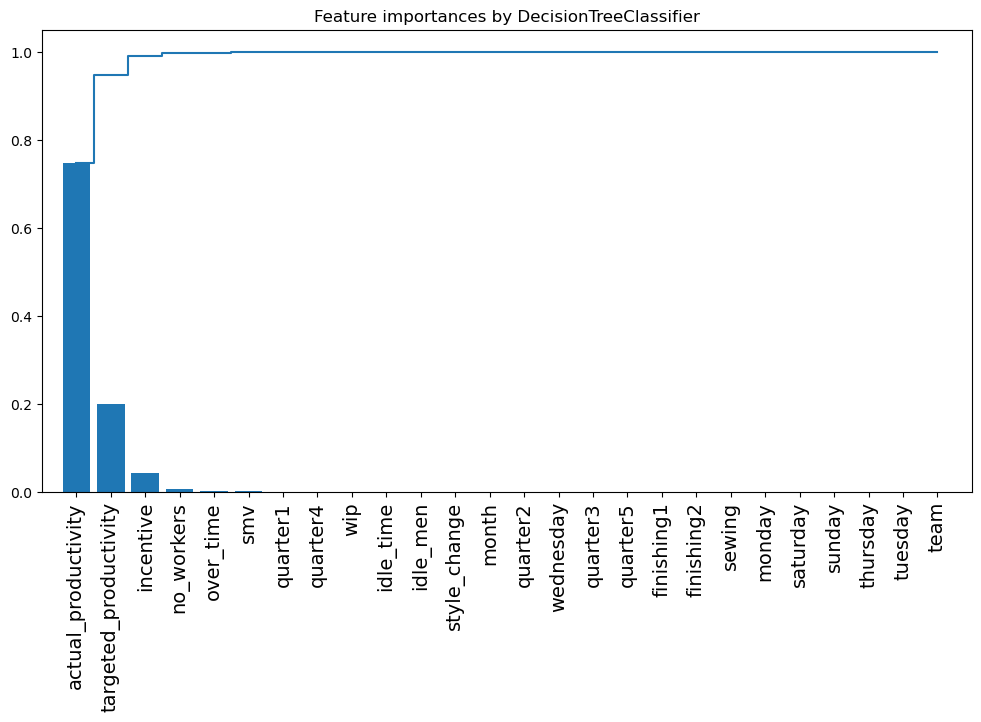

In [38]:
#Fit Logistic Regression
df_dtc = df_failure.copy()
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

target_name = 'failure'
X = df_dtc.drop('failure', axis=1)


y=df_dtc[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

importances = dtree.feature_importances_
feat_names = df_dtc.drop(['failure'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

plt.show()

In [43]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame> combined estimated coefficient and standard error of model estimate
    """
    coef = results.params
    std_err = results.bse
    
    df_cse = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df_cse

In [45]:
# Create OLS model object
df_model = df_failure.copy()
model = smf.ols("failure ~ actual_productivity + targeted_productivity + incentive", \
                df_model)

# Fit the model
results_model_weight = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_weight = print_coef_std_err(results_model_weight)
print(results_weight)

                           coef   std err
Intercept              0.659553  0.073374
actual_productivity   -1.997117  0.059930
targeted_productivity  1.472554  0.107013
incentive             -0.000030  0.000055
